In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
!pip install flask-cors

In [3]:

data = pd.read_csv('diabetes.csv')  

data.fillna(data.mean(), inplace=True)

In [ ]:
print(cleaned_data.columns)

In [10]:

Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
IQR = Q3 - Q1
cleaned_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(cleaned_data.columns)

Index(['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')


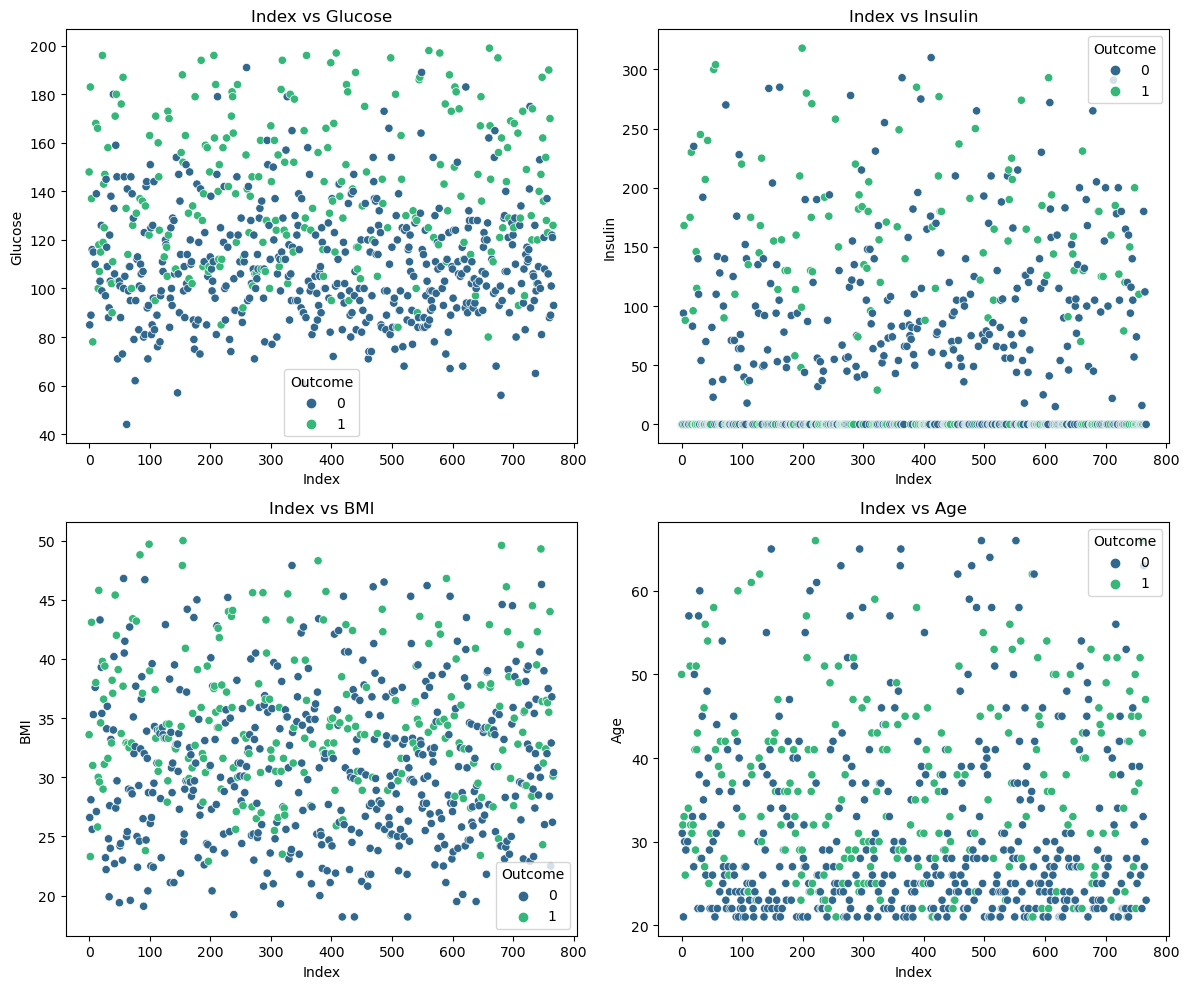

In [18]:
features = ['Glucose', 'Insulin', 'BMI', 'Age']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i) 
    sns.scatterplot(x=cleaned_data.index, y=feature, hue='Outcome', data=cleaned_data, palette='viridis')
    plt.title(f"Index vs {feature}")
    plt.xlabel("Index")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
X=cleaned_data.['Glucose', 'Insulin', 'BMI', 'Age']
y=cleaned_data.['Outcome']

In [23]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [28]:
print(X_scaled)

[[ 1.54691429  0.94187585 -0.80397773  0.22523493]
 [-0.17163634 -1.17982393 -0.80397773 -0.85274706]
 [-0.0811863   2.12059795 -0.80397773 -1.36093857]
 ...
 [-0.26208637  0.03257594  0.60292076 -0.91434603]
 [ 1.27556419  0.20096481 -0.80397773 -0.31375607]
 [-0.8952366  -0.91040174 -0.80397773 -0.26755684]]


In [32]:

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

y_pred_nb = naive_bayes_model.predict(X_test)

In [41]:

perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_model.fit(X_train, y_train)

y_pred_perceptron = perceptron_model.predict(X_test)

In [40]:

learning_rate = 0.1
max_iter = 1000
weights = np.zeros(X_train.shape[1])  
bias = 0

for _ in range(max_iter):
    for idx in range(len(X_train)):
        x_i = X_train[idx]
        linear_output = np.dot(x_i, weights) + bias
        
        y_predicted = np.sign(linear_output)
        
        if y_predicted != y_train.iloc[idx]: 
            weights += learning_rate * y_train.iloc[idx] * x_i
            bias += learning_rate * y_train.iloc[idx]

y_pred_perceptron = np.sign(np.dot(X_test, weights) + bias)

In [42]:

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

perc_accuracy = accuracy_score(y_test, y_pred_perceptron)
perc_precision = precision_score(y_test, y_pred_perceptron, average='weighted')
perc_recall = recall_score(y_test, y_pred_perceptron, average='weighted')
perc_f1 = f1_score(y_test, y_pred_perceptron, average='weighted')

print("Naive Bayes - Accuracy:", nb_accuracy, "\nPrecision:", nb_precision, "\nRecall:", nb_recall, "\nF1:", nb_f1)
print("Perceptron - Accuracy:", perc_accuracy, "\nPrecision:", perc_precision, "\nRecall:", perc_recall, "\nF1:", perc_f1)

Naive Bayes - Accuracy: 0.7446808510638298 
Precision: 0.7418231023235617 
Recall: 0.7446808510638298 
F1: 0.7430955751859457
Perceptron - Accuracy: 0.6595744680851063 
Precision: 0.6256065696155282 
Recall: 0.6595744680851063 
F1: 0.6316109422492401


In [10]:
#save models
import pickle
with open(r'C:\Users\LENOVO\Desktop\Y4S1\ML\Assignment\4\models\naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

with open(r'C:\Users\LENOVO\Desktop\Y4S1\ML\Assignment\4\models\perceptron_model.pkl', 'wb') as file:
    pickle.dump(perceptron_model, file)

print("Models saved successfully.")

Models saved successfully.


We observed that the Naive Bayes model performs better than Perceptron across all metrics.
While the Perceptron may still be a viable option for simpler problems or scenarios where linear decision boundaries are well-suited, Naive Bayes shows superior performance in terms of prediction quality, especially with categorical data or situations with some degree of independence between features.

Naive Bayes assumes that features are conditionally independent given the class. This assumption can often work well when the features are indeed relatively independent, or when the data is noisy but follows a distribution that aligns with the model's assumptions (e.g., Gaussian distribution for continuous features or multinomial for categorical features).

Perceptron, on the other hand, is a linear classifier and doesn't make the independence assumption. It simply tries to separate the classes using a linear decision boundary. If the data has a lot of noise or the classes aren’t linearly separable, the Perceptron can struggle. Given that your Perceptron’s performance is worse than Naive Bayes, it suggests that the data might not be linearly separable or that the features are not well-represented by a simple linear model.

The performance difference might be due to: class imbalance, noise, feature independence, non-linear relationships, strong dependance on class and such.